# Exercise 09

## 3.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### (a)

In [2]:
x1 = np.random.rand(500) - 0.5
x2 = np.random.rand(500) - 0.5

y = 1 * (x1**2 - x2**2 > 0)

### (b)

In [3]:
x1_b = x1[x1**2 - x2**2 > 0]
x2_b = x2[x1**2 - x2**2 > 0]

x1_r = x1[x1**2 - x2**2 < 0]
x2_r = x2[x1**2 - x2**2 < 0]

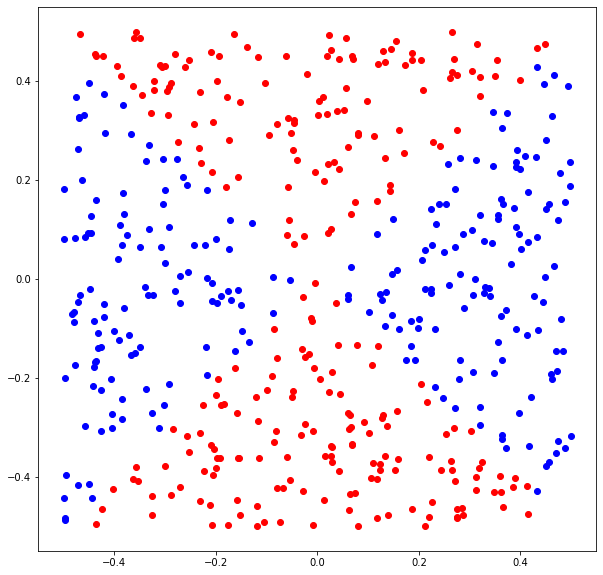

In [4]:
plt.figure(figsize=(10,10))
plt.scatter(x1_b, x2_b, c='blue')
plt.scatter(x1_r, x2_r, c='red')
plt.show()

### (c)

In [5]:
train = list(zip(x1, x2))

In [6]:
from sklearn.linear_model import LogisticRegression

lor = LogisticRegression()

### (d)

In [7]:
lor.fit(train, y)
lor.score(train, y)

0.52

In [8]:
pre = lor.predict(train)

In [9]:
x1_b = x1[pre==1]
x2_b = x2[pre==1]

x1_r = x1[pre!=1]
x2_r = x2[pre!=1]

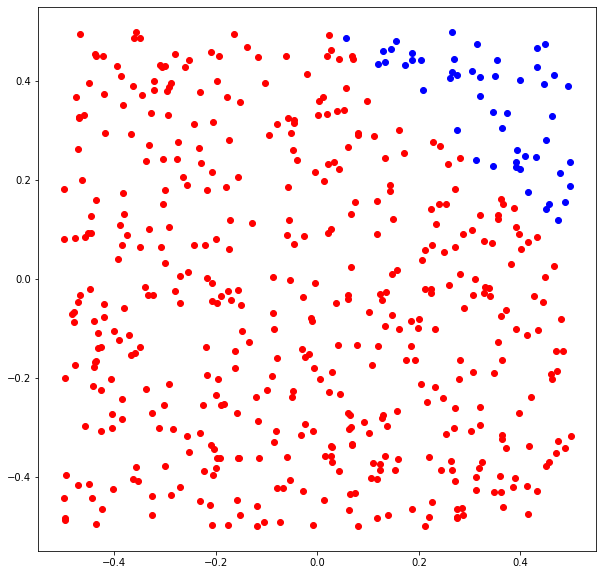

In [10]:
plt.figure(figsize=(10,10))
plt.scatter(x1_b, x2_b, c='blue')
plt.scatter(x1_r, x2_r, c='red')
plt.show()

### (e)

In [11]:
x3 = x1**2
x4 = x1*x2
x5 = x2**2

In [12]:
train2 = list(zip(x1, x2, x3, x4, x5))

In [13]:
lor.fit(train2, y)
lor.score(train2, y)

0.948

### (f)

In [14]:
pre2 = lor.predict(train2)

In [15]:
x1_b = x1[pre2==1]
x2_b = x2[pre2==1]

x1_r = x1[pre2!=1]
x2_r = x2[pre2!=1]

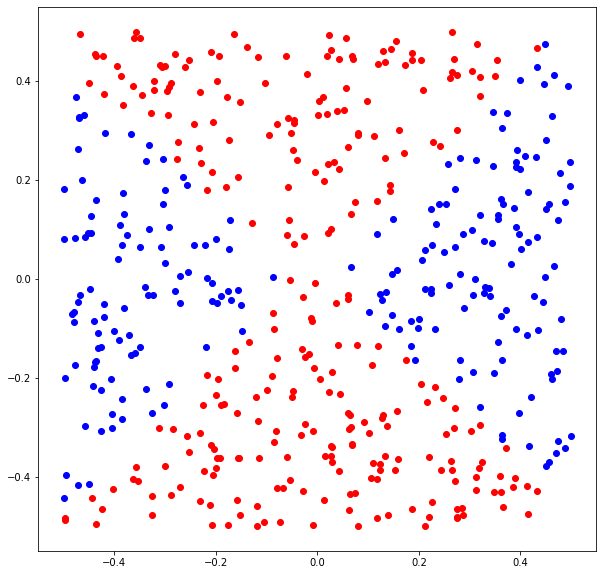

In [16]:
plt.figure(figsize=(10,10))
plt.scatter(x1_b, x2_b, c='blue')
plt.scatter(x1_r, x2_r, c='red')
plt.show()

### (g)

In [17]:
from sklearn.svm import SVC

svc = SVC(kernel='linear')
svc.fit(train, y)
svc.score(train, y)

0.522

In [18]:
pre3 = svc.predict(train)

In [19]:
x1_b = x1[pre3==1]
x2_b = x2[pre3==1]

x1_r = x1[pre3!=1]
x2_r = x2[pre3!=1]

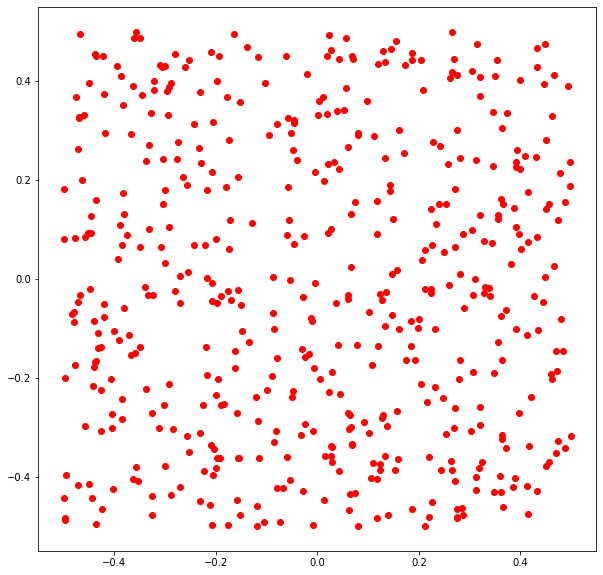

In [20]:
plt.figure(figsize=(10,10))
plt.scatter(x1_b, x2_b, c='blue')
plt.scatter(x1_r, x2_r, c='red')
plt.show()

### (h)

In [21]:
svc2 = SVC(kernel='rbf')
svc2.fit(train, y)
svc2.score(train, y)

0.968

In [22]:
pre4 = svc2.predict(train)

In [23]:
x1_b = x1[pre4==1]
x2_b = x2[pre4==1]

x1_r = x1[pre4!=1]
x2_r = x2[pre4!=1]

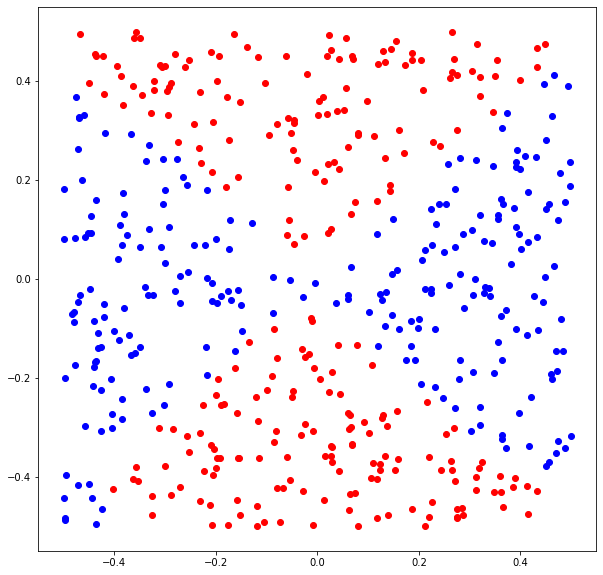

In [24]:
plt.figure(figsize=(10,10))
plt.scatter(x1_b, x2_b, c='blue')
plt.scatter(x1_r, x2_r, c='red')
plt.show()

### (i)

실제 데이터 자체가 비선형적인 형태라 일반적인 선형 로지스틱회귀나 SVM으로는 좋은 성능을 보이지 못함.

하지만 각각에 비선형성을 섞어주면 충분히 분류를 잘하는걸 볼 수 있음.

## 8.

In [25]:
import sys, os
from google.colab import drive

drive.mount('/content/drive')
os.chdir('/content/drive/MyDrive/data/islr2')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [26]:
data = pd.read_csv('./OJ.csv')

In [27]:
data['Store7'] = data['Store7'].map({'Yes':1, 'No':0})

In [28]:
from sklearn.model_selection import train_test_split
train = data.drop(['Purchase'], axis=1)
target = data['Purchase']

X_train, X_test, y_train, y_test = train_test_split(train, target, test_size=0.2, random_state=97)

In [29]:
svc = SVC(kernel='linear', C=0.01)
svc.fit(X_train, y_train)
1 - svc.score(X_train, y_train), 1 - svc.score(X_test, y_test)

(0.24415887850467288, 0.2850467289719626)